# Proyecto: Deportistas mejores pagadados
 ---

In [2]:
import pandas as pd

In [5]:
atheletes=pd.read_csv("Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv")

## Pre-procesamiento de la datebase

In [6]:
atheletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [7]:
atheletes.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [8]:
atheletes.columns.values

array(['S.NO', 'Name', 'Nationality', 'Current Rank',
       'Previous Year Rank', 'Sport', 'Year', 'earnings ($ million)'],
      dtype=object)

De acuerdo la la infor de `atheletes.info()` la unica variable con datos faltantes es `Previous Year Rank`

In [11]:
missing_year_rank=atheletes['Previous Year Rank'].isnull().sum()
number_rows=len(atheletes)
print('Porcentaje total de datos perdidos del Previous Year Rank:',(missing_year_rank/number_rows)*100, '%')

Porcentaje total de datos perdidos del Previous Year Rank: 7.973421926910299 %


Se ajusta la variable `year` a un tipo de dato temporal

In [14]:
atheletes['Year_datetimme']=pd.to_datetime(atheletes['Year'])

In [17]:
atheletes['Year_datetimme']

0     1970-01-01 00:00:00.000001990
1     1970-01-01 00:00:00.000001990
2     1970-01-01 00:00:00.000001990
3     1970-01-01 00:00:00.000001990
4     1970-01-01 00:00:00.000001990
                   ...             
296   1970-01-01 00:00:00.000002020
297   1970-01-01 00:00:00.000002020
298   1970-01-01 00:00:00.000002020
299   1970-01-01 00:00:00.000002020
300   1970-01-01 00:00:00.000002020
Name: Year_datetimme, Length: 301, dtype: datetime64[ns]

Cuales son los deportes en este censo

In [18]:
atheletes['Sport'].unique().tolist()

['boxing',
 'auto racing',
 'golf',
 'basketball',
 'Basketball',
 'Boxing',
 'Auto Racing',
 'Golf',
 'Tennis',
 'NFL',
 'Auto racing',
 'NBA',
 'Baseball',
 'Ice Hockey',
 'American Football / Baseball',
 'tennis',
 'ice hockey',
 'F1 Motorsports',
 'NASCAR',
 'Hockey',
 'Auto Racing (Nascar)',
 'F1 racing',
 'American Football',
 'soccer',
 'baseball',
 'cycling',
 'motorcycle gp',
 'Soccer',
 'MMA']

Se observa que no todos los deportes estan formateados con la misma cadena de caracteres

In [39]:
def replace_all(variable, dic):
    for orig, rep in dic.items():
        variable = variable.replace(orig, rep)
    return variable


`replace_all` es una funcion para remplazar strings por otro en todos los datos de una misma variable

Se crea un diccionario para reemplazar strings de deportes repetidos

In [40]:
sports_rename=dict({'basketball':'Basketball',
'boxing':'Boxing',
'baseball':'Baseball',
'tennis':'Tennis',
'auto racing':'Auto Racing',
'golf':'Golf',
 'ice hockey':'Ice Hockey',
 'soccer':'Soccer'
})
atheletes['Sport']=replace_all(atheletes['Sport'],sports_rename)

Se presentan a continuacion la lista de deportes final 

In [41]:
atheletes['Sport'].unique().tolist()

['Boxing',
 'Auto Racing',
 'Golf',
 'Basketball',
 'Tennis',
 'NFL',
 'Auto racing',
 'NBA',
 'Baseball',
 'Ice Hockey',
 'American Football / Baseball',
 'F1 Motorsports',
 'NASCAR',
 'Hockey',
 'Auto Racing (Nascar)',
 'F1 racing',
 'American Football',
 'Soccer',
 'cycling',
 'motorcycle gp',
 'MMA']

In [44]:
atheletes['Year'].unique().tolist()

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

###  Mejores artistas pagados en 2020

In [46]:
import numpy as np
import seaborn as sns


<AxesSubplot:xlabel='earnings ($ million)', ylabel='Count'>

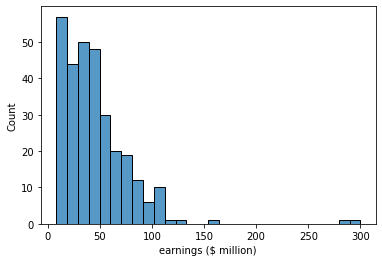

In [47]:
sns.histplot(atheletes['earnings ($ million)'],kde=False)

In [49]:
ganancias_2020=atheletes[atheletes['Year']==2020].loc[:,('Name','earnings ($ million)')]
ganancias_2020

,Name,earnings ($ million)
291,Roger Federer,106.3
292,Cristiano Ronaldo,105.0
293,Lionel Messi,104.0
294,Neymar,95.5
295,LeBron James,88.2
296,Stephen Curry,74.4
297,Kevin Durant,63.9
298,Tiger Woods,62.3
299,Kirk Cousins,60.5
300,Carson Wentz,59.1


<AxesSubplot:xlabel='Name'>

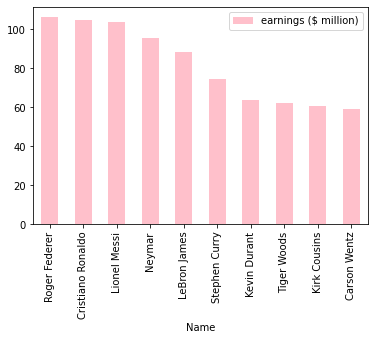

In [51]:
ganancias_2020.plot(kind='bar',x='Name',y='earnings ($ million)',color='pink')

### Análisis de los atletas mejor pagados entre 1990 y 2020.

In [54]:
best_per_year=atheletes[atheletes['Current Rank']==1].loc[:,('Name','Year','Sport', 'earnings ($ million)')]
best_per_year

,Name,Year,Sport,earnings ($ million)
0,Mike Tyson,1990,Boxing,28.6
10,Evander Holyfield,1991,Boxing,60.5
20,Michael Jordan,1992,Basketball,35.9
30,Michael Jordan,1993,Basketball,36.0
40,Michael Jordan,1994,Basketball,30.0
50,Michael Jordan,1995,Basketball,43.9
60,Mike Tyson,1996,Boxing,75.0
70,Michael Jordan,1997,Basketball,78.3
80,Michael Jordan,1998,Basketball,69.0
90,Michael Schumacher,1999,Auto Racing,49.0


### ¿Cuánto ingresan los mejores atletas cada año?

In [62]:
sport_ranked=pd.DataFrame(atheletes['Sport'].value_counts())
sport_ranked.columns=['Sport','Ranked count']

<AxesSubplot:>

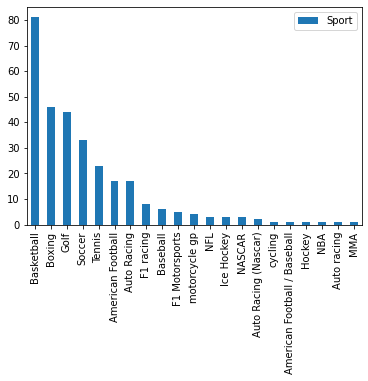

In [70]:
sport_ranked.plot.bar(rot=90, stacked=False)


### Analisis del Data Base
---

* 1. Deportistas cuyo ranking ha subido al menos dos lugares entre 2010 y 2020.

In [75]:
ranked_10=atheletes[atheletes['Year']==2010].loc[:,('Name','Current Rank')]
ranked_20=atheletes[atheletes['Year']==2020].loc[:,('Name','Current Rank')]
atheletes_upranked=np.where(ranked_10['Ranked']>ranked_20['Ranked'])